# Importing all the required libraries

In [1]:
import pandas as pd #For analysis of the data
import seaborn as sns #For Data Visualization
from sklearn.model_selection import train_test_split #For splitting the data into training and testing dataset
from sklearn.ensemble import RandomForestClassifier #Algorithm for classification
from sklearn.linear_model import LogisticRegression #Algorithm for classification
from sklearn.preprocessing import LabelEncoder #To handle categorical data, we will use Label Encoder
from sklearn import metrics 
from sklearn.metrics import accuracy_score #For finding accuracy score of the model
import matplotlib.pyplot as plt #For Data Visualization

## Importing the data

In [2]:
df = pd.read_csv('loan_data.csv')

## Analyzing the data

In [3]:
df.head(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


### Here we see that the data has no values and majority of the columns have categorical data

<AxesSubplot:xlabel='Income', ylabel='count'>

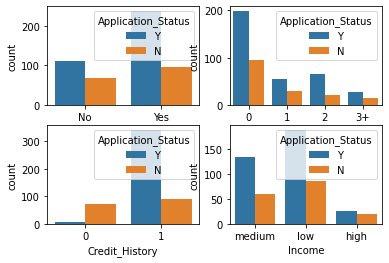

In [5]:
plt.subplot(2,2,1)
sns.countplot(x=df['Married'],data=df,hue='Application_Status')

plt.subplot(2,2,2)
sns.countplot(x=df['Dependents'],data=df,hue='Application_Status')

plt.subplot(2,2,3)
sns.countplot(x=df['Credit_History'],data=df,hue='Application_Status')

plt.subplot(2,2,4)
sns.countplot(x=df['Income'],data=df,hue='Application_Status')


## We plot some count plots to check the number of approved and disapproved applications with respect to some columns.

# 1. % of total applicants for each unique value of dependents

In [6]:
# We create a dataframe by taking the number of dependents into consideration

dependants_df = pd.DataFrame(df['Dependents'].value_counts(),index=df['Dependents'].unique())
dependants_df

,Dependents
0,294
1,85
2,88
3+,44


In [7]:
total = df.shape[0] # Here we store the total number of applications which is 511 in the 'total' variable

In [8]:
arr = dependants_df['Dependents']
arr

0     294
1      85
2      88
3+     44
Name: Dependents, dtype: int64

In [9]:
# We are finding % of total applicants for each number of dependents

total_applicants_percentage = []
num = 0
for i in arr:
    total_applicants_percentage.append((i*100)/total)
    if(num==3):
        print((i*100)/total,f"% of total applicats are with {num}+ : dependents")
    else:
        print((i*100)/total,f"% of total applicats are with {num} : dependents")
    num+=1

57.534246575342465 % of total applicats are with 0 : dependents
16.634050880626223 % of total applicats are with 1 : dependents
17.22113502935421 % of total applicats are with 2 : dependents
8.610567514677104 % of total applicats are with 3+ : dependents


In [10]:
dependants_df['% of total applicants'] = total_applicants_percentage

In [11]:
dependants_df

,Dependents,% of total applicants
0,294,57.534247
1,85,16.634051
2,88,17.221135
3+,44,8.610568


### We found that the maximum number of applicants have 0 dependents

# 2. % of applications approved for self-employed applicants

In [12]:
df.head(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [13]:
# We group the data wrt 'Self_Employed' and 'Application_Status' columns
df.groupby(['Self_Employed','Application_Status']).count() 

Application_ID  Gender  Married  Dependents  \
Self_Employed Application_Status                                                
No            N                              140     140      140         140   
              Y                              301     301      301         301   
Yes           N                               24      24       24          24   
              Y                               46      46       46          46   

                                  Education  Credit_History  Property_Area  \
Self_Employed Application_Status                                             
No            N                         140             140            140   
              Y                         301             301            301   
Yes           N                          24              24             24   
              Y                          46              46             46   

                                  Income  
Self_Employed Application_Status          
No            N                      140  
              Y                      301  
Yes           N                       24  
              Y                       46

In [14]:
self_employed_and_approved = (46*100)/511
print(f'Total % of applicants who are self-employed and their application is approved: {self_employed_and_approved}')

Total % of applicants who are self-employed and their application is approved: 9.001956947162427


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

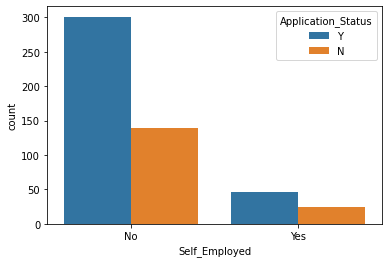

In [15]:
sns.countplot(x=df['Self_Employed'],data=df,hue='Application_Status')

### We can see that self employed people's application approval rate is very low.

# 3. % of rejections for married male applicants

In [16]:
# We group the data wrt 'Married','Application_Status' and 'Gender' columns
df.groupby(['Married','Application_Status','Gender']).count()

Application_ID  Dependents  Education  \
Married Application_Status Gender                                          
No      N                  Female              26          26         26   
                           Male                43          43         43   
        Y                  Female              40          40         40   
                           Male                71          71         71   
Yes     N                  Female               8           8          8   
                           Male                87          87         87   
        Y                  Female              17          17         17   
                           Male               219         219        219   

                                   Self_Employed  Credit_History  \
Married Application_Status Gender                                  
No      N                  Female             26              26   
                           Male               43              43   
        Y                  Female             40              40   
                           Male               71              71   
Yes     N                  Female              8               8   
                           Male               87              87   
        Y                  Female             17              17   
                           Male              219             219   

                                   Property_Area  Income  
Married Application_Status Gender                         
No      N                  Female             26      26  
                           Male               43      43  
        Y                  Female             40      40  
                           Male               71      71  
Yes     N                  Female              8       8  
                           Male               87      87  
        Y                  Female             17      17  
                           Male              219     219

In [17]:
married_male_and_rejected = (87*100)/511
print(f'Total % of applicants who are married males and their application is rejected: {married_male_and_rejected}')

Total % of applicants who are married males and their application is rejected: 17.025440313111545


# 4. Which property area has the maximum approval ratio

In [18]:
# We group the data wrt 'Property_Area' and 'Application_Status' columns
df.groupby(['Property_Area','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Property_Area Application_Status                                                
Rural         N                               59      59       59          59   
              Y                               90      90       90          90   
Semiurban     N                               44      44       44          44   
              Y                              153     153      153         153   
Urban         N                               61      61       61          61   
              Y                              104     104      104         104   

                                  Education  Self_Employed  Credit_History  \
Property_Area Application_Status                                             
Rural         N                          59             59              59   
              Y                          90             90              90   
Semiurban     N                          44             44              44   
              Y                         153            153             153   
Urban         N                          61             61              61   
              Y                         104            104             104   

                                  Income  
Property_Area Application_Status          
Rural         N                       59  
              Y                       90  
Semiurban     N                       44  
              Y                      153  
Urban         N                       61  
              Y                      104

In [19]:
rural = (90*100)/511
semi_urban = (153*100)/511
urban = (104*100)/511

print(f'rural = {rural}\nsemi-urban = {semi_urban}\nurban = {urban}\n')

print(f'Property area with maximum approval ratio: Semi-Urban')

rural = 17.61252446183953
semi-urban = 29.941291585127203
urban = 20.35225048923679

Property area with maximum approval ratio: Semi-Urban


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

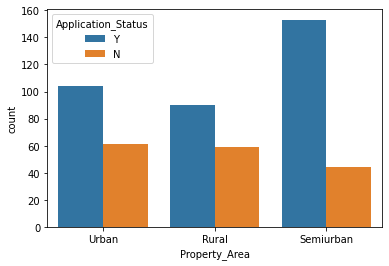

In [20]:
sns.countplot(x=df['Property_Area'],data=df,hue='Application_Status')

### We can see that the approval rate of semi-urban area if the highest and that of rural area is the lowest.

# 5. Find average number of dependents per income group

In [21]:
df.head(5)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [22]:
df.groupby(['Income','Dependents']).count()

Application_ID  Gender  Married  Education  Self_Employed  \
Income Dependents                                                              
high   0                       21      21       21         21             21   
       1                       13      13       13         13             13   
       2                        6       6        6          6              6   
       3+                       5       5        5          5              5   
low    0                      173     173      173        173            173   
       1                       42      42       42         42             42   
       2                       41      41       41         41             41   
       3+                      17      17       17         17             17   
medium 0                      100     100      100        100            100   
       1                       30      30       30         30             30   
       2                       41      41       41         41             41   
       3+                      22      22       22         22             22   

                   Credit_History  Property_Area  Application_Status  
Income Dependents                                                     
high   0                       21             21                  21  
       1                       13             13                  13  
       2                        6              6                   6  
       3+                       5              5                   5  
low    0                      173            173                 173  
       1                       42             42                  42  
       2                       41             41                  41  
       3+                      17             17                  17  
medium 0                      100            100                 100  
       1                       30             30                  30  
       2                       41             41                  41  
       3+                      22             22                  22

## For all the income categories, the average number of dependents lies between 0 and 1 as in all the income categories, the maximum number of applicants have 0 dependents.

# 6. Find approval ratio for various combinations of Property_Area and Marrital status

In [23]:
# We group the data wrt 'Property_Area','Married' and 'Application_Status' columns
df.groupby(['Property_Area','Married','Application_Status']).count()

Application_ID  Gender  Dependents  \
Property_Area Married Application_Status                                       
Rural         No      N                               22      22          22   
                      Y                               34      34          34   
              Yes     N                               37      37          37   
                      Y                               56      56          56   
Semiurban     No      N                               21      21          21   
                      Y                               47      47          47   
              Yes     N                               23      23          23   
                      Y                              106     106         106   
Urban         No      N                               26      26          26   
                      Y                               30      30          30   
              Yes     N                               35      35          35   
                      Y                               74      74          74   

                                          Education  Self_Employed  \
Property_Area Married Application_Status                             
Rural         No      N                          22             22   
                      Y                          34             34   
              Yes     N                          37             37   
                      Y                          56             56   
Semiurban     No      N                          21             21   
                      Y                          47             47   
              Yes     N                          23             23   
                      Y                         106            106   
Urban         No      N                          26             26   
                      Y                          30             30   
              Yes     N                          35             35   
                      Y                          74             74   

                                          Credit_History  Income  
Property_Area Married Application_Status                          
Rural         No      N                               22      22  
                      Y                               34      34  
              Yes     N                               37      37  
                      Y                               56      56  
Semiurban     No      N                               21      21  
                      Y                               47      47  
              Yes     N                               23      23  
                      Y                              106     106  
Urban         No      N                               26      26  
                      Y                               30      30  
              Yes     N                               35      35  
                      Y                               74      74

In [24]:
# We group the data wrt 'Property_Area' and 'Married' cols

df_new = df.groupby(['Property_Area','Married']).count()

# We select only the rural and urban columns using iloc function, 
# and concatenate both the dataframes into one dataframe

df_rural = df_new.iloc[0:2,:]
df_urban = df_new.iloc[4:6,:]
df_final = pd.concat([df_rural,df_urban])

#Renamed the columns
df_final.rename(columns={'Married':'Marital_Status', 'Application_ID':'# of Applicants'},inplace=True)


#Dropped the unwanted columns
df_final.drop(columns=['Gender','Dependents','Education','Self_Employed','Credit_History','Income'],axis=1,inplace=True)
df_final.drop(columns=['Application_Status'],axis=1,inplace=True)

#Now we find the approval ratio
#We consider only the applicants wrt the particular property area

rural_not_married = (34*100)/149
rural_married = (56*100)/149

urban_not_married = (30*100)/165
urban_married = (74*100)/165

ls = [rural_not_married,rural_married,urban_not_married,urban_married]
df_final['Approval_Ratio'] = ls
df_final

# of Applicants  Approval_Ratio
Property_Area Married                                 
Rural         No                    56       22.818792
              Yes                   93       37.583893
Urban         No                    56       18.181818
              Yes                  109       44.848485

# 7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

In [25]:
df.head(2)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N


### As a preprocessing step, we have to remove the unwanted columns. Here, the Application_ID column has no effect on the final result, hence we will drop it.

In [26]:
df.drop(columns=['Application_ID'],axis=1,inplace=True)

In [27]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,Male,No,0,Graduate,No,1,Urban,medium,Y
1,Male,Yes,1,Graduate,No,1,Rural,medium,N


### Now, before putting our dataset into the models, we have to convert the categorical data into numerical data. 
### For that, we will use Label Encoding, which will assign values starting from 0,1... depending upon the categories in a particular column.

In [29]:
le = LabelEncoder()
cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income',
        'Application_Status']
for i in cols:
    df[i] = le.fit_transform(df[i])
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


## We plot a heatmap to check the correlation between the columns.

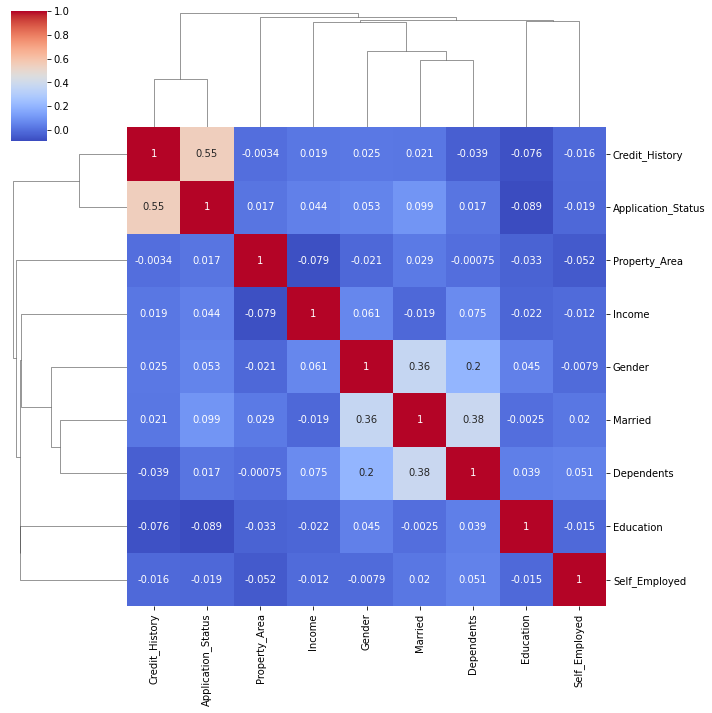

In [30]:
cr = df.corr()
sns.clustermap(cr,cmap='coolwarm',annot=True)

### Now we have only numerical data
### We will take Application_Status column as our target variable(y) and all the remaining columns as data points to be used for prediction(x)
### After that, we will split the data into training and testing data.

In [31]:
x = df[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income']]
y = df[['Application_Status']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)


### Our data is ready to be fitted into our models.
### We create two model objects, one for Logistic Regression and second for Random Forest and finally fit the training data

In [32]:
model_1 = LogisticRegression()
model_2 = RandomForestClassifier(max_depth=4)

model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13536\2321822609.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2.fit(x_train,y_train)


RandomForestClassifier(max_depth=4)

### As training is completed, we fit predict our models using the test data and find their respective accuracy score.

In [33]:
predict_model_1 = model_1.predict(x_test)
predict_model_2 = model_2.predict(x_test)

print(f'Logistic Regression - {accuracy_score(y_test,predict_model_1)*100}')
print(f'Random Forest - {accuracy_score(y_test,predict_model_2)*100}')

Logistic Regression - 87.37864077669903
Random Forest - 86.40776699029125


### We can see here that both Logistic Regression and Random Forest algorithms have a decent accuracy score, and Logistic Regression has a slightly better score.
### Important: No prediction is 100% accurate, there are some predictions which are false positive and some which are false negative.

### As this is a loan prediction problem, we should work on reducing the false negative and false positive predictions.

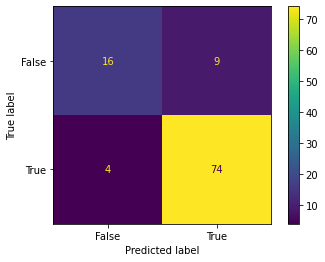

In [34]:
cm = metrics.confusion_matrix(y_test,predict_model_1)
cm_viz = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])

cm_viz.plot()

### Here,the top right quadrant is the "FALSE-POSITIVE" quadrant, where the actual label is false, but our model is predicting true.
### The bottom left quadrant is the "FALSE-NEGATIVE" quadrant, where the actual label is true, but our model is predicting false.